<h3><b>A SAMPLING METHOD TO DRAW SAMPLES FROM A MULTIVARIATE NORMAL (MVN) DISTRIBUTION IN JAX</b></h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jax import random

sns.set()

In [4]:
d = 2   # dimension
m = np.array([1, 4]).reshape(2, 1)   # mean vector
K_0 =  np.array([[3, 1], [1, 8]])   # covariance function

In [5]:
epsilon = 0.0001    # epsilon
perturbation = epsilon * np.identity(d)
K = K_0 + perturbation    # adding small perturbation
L = np.linalg.cholesky(K)   # cholesky decomposition
np.dot(L, np.transpose(L))
n = 10000   # no. of samples

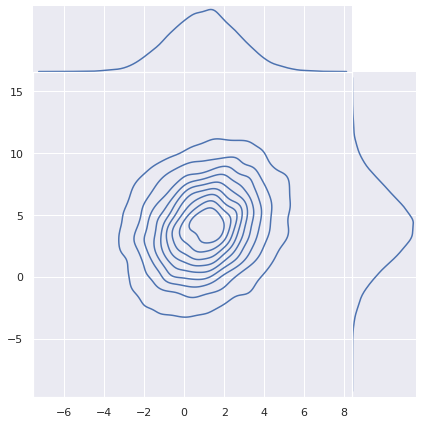

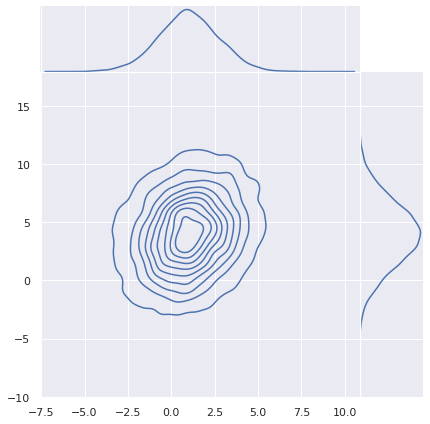

In [6]:
u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)
x = m + np.dot(L, u)
sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);
z = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n)
y = np.transpose(z)
sns.jointplot(x=y[0], y=y[1], kind="kde", space=0)    # plot density function

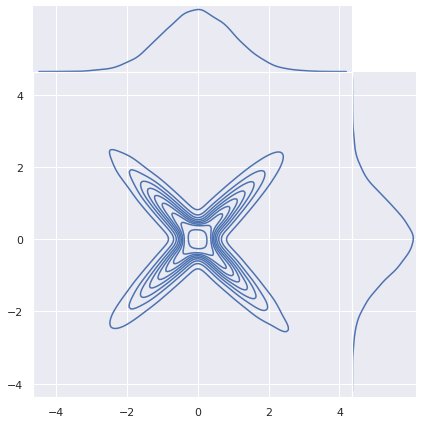

In [7]:
z_1 = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale=1, size=n)
z_2 = np.sign(z)*z_1
sns.jointplot(x=z_1, y=z_2, kind="kde", space=0)